<a href="https://colab.research.google.com/github/TanDat1239/B1913292_ThaiDiepTanDat_BACKEND/blob/main/YOLOv7_Miai_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#clone source code to yolov7_train
%cd /content/drive/MyDrive/yolov7_train
!git clone https://github.com/augmentedstartups/yolov7.git #https://github.com/WongKinYiu/yolov7

In [ ]:
#cài đặt thư viện
%cd /content/drive/MyDrive/yolov7_train/yolov7
!pip install -r requirements.txt

In [ ]:
#tải weight pretrain test
%cd /content/drive/MyDrive/yolov7_train/yolov7
!mkdir pretrain
%cd pretrain
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# Tải ảnh sample từ internet
%cd /content/drive/MyDrive/yolov7_train/yolov7
!mkdir test_images
%cd test_images
!wget https://cdn.theculturetrip.com/wp-content/uploads/2017/11/15271255494_fcc90d3f9b_k.jpg
!wget https://cdnimgen.vietnamplus.vn/t620/uploaded/wbxx/2020_05_13/85896_3585300525545474_a1.jpg
!wget https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2020/4/22/800234/Chay-Pho-Co-9.jpg
!wget https://i-vnexpress.vnecdn.net/2019/03/23/chay-1-3737-1553317413.jpg

In [ ]:
# Nhận diện thử với weight pretrain 
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights pretrain/yolov7.pt --source test_images/15271255494_fcc90d3f9b_k.jpg

In [ ]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp/15271255494_fcc90d3f9b_k.jpg"))

TRAIN MODEL

In [ ]:
# Giải nén dữ liệu đê train model
%cd /content/drive/MyDrive/yolov7_train
!mkdir train_data
%cd train_data
!unzip ../firedata.zip

/content/drive/MyDrive/yolov7_train
mkdir: cannot create directory ‘train_data’: File exists
/content/drive/MyDrive/yolov7_train/train_data
Archive:  ../firedata.zip
  inflating: 000001.jpg              
replace __MACOSX/._000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Tổ chức lại thư mục train. Lý do: Vì YOLOv7 yêu cầu
# train
#   - images
#   - labels
# test
#   - images
#   - labels

%cd /content/drive/MyDrive/yolov7_train/train_data
!mkdir train
!mkdir train/images
!mkdir train/labels
!mv *.jpg train/images
!mv *.txt train/labels

/content/drive/MyDrive/yolov7_train/train_data


In [ ]:
# Khai báo 1 file yaml để YOLOv7 biết:
# - Đường dẫn đến thư mục train, test (nếu có, nếu không thì dùng luôn đường dẫn đến train)
# - Số lượng class qua biến nc (number of class)
# - Tên của các class
%cd /content/drive/MyDrive/yolov7_train/yolov7
!rm data/mydataset.yaml # nếu có
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['fire']" >> data/mydataset.yaml

/content/drive/MyDrive/yolov7_train/yolov7


In [1]:
# Train model YOLOv7 với dữ liệu fire
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 20 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

/content/drive/MyDrive/yolov7_train/yolov7
2023-05-25 02:54:36.171070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 02:54:37.006664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-104-g941b94c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='pretrain/yolov7.pt', cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=20, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', ent

In [2]:
#Nhận diện thử Lửa với weights vừa train sau 100 epochs
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights /content/drive/MyDrive/yolov7_train/yolov7/runs/train/exp23/weights/last.pt --source test_images/Chay-Pho-Co-9.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['/content/drive/MyDrive/yolov7_train/yolov7/runs/train/exp23/weights/last.pt'], source='test_images/Chay-Pho-Co-9.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-104-g941b94c torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.c

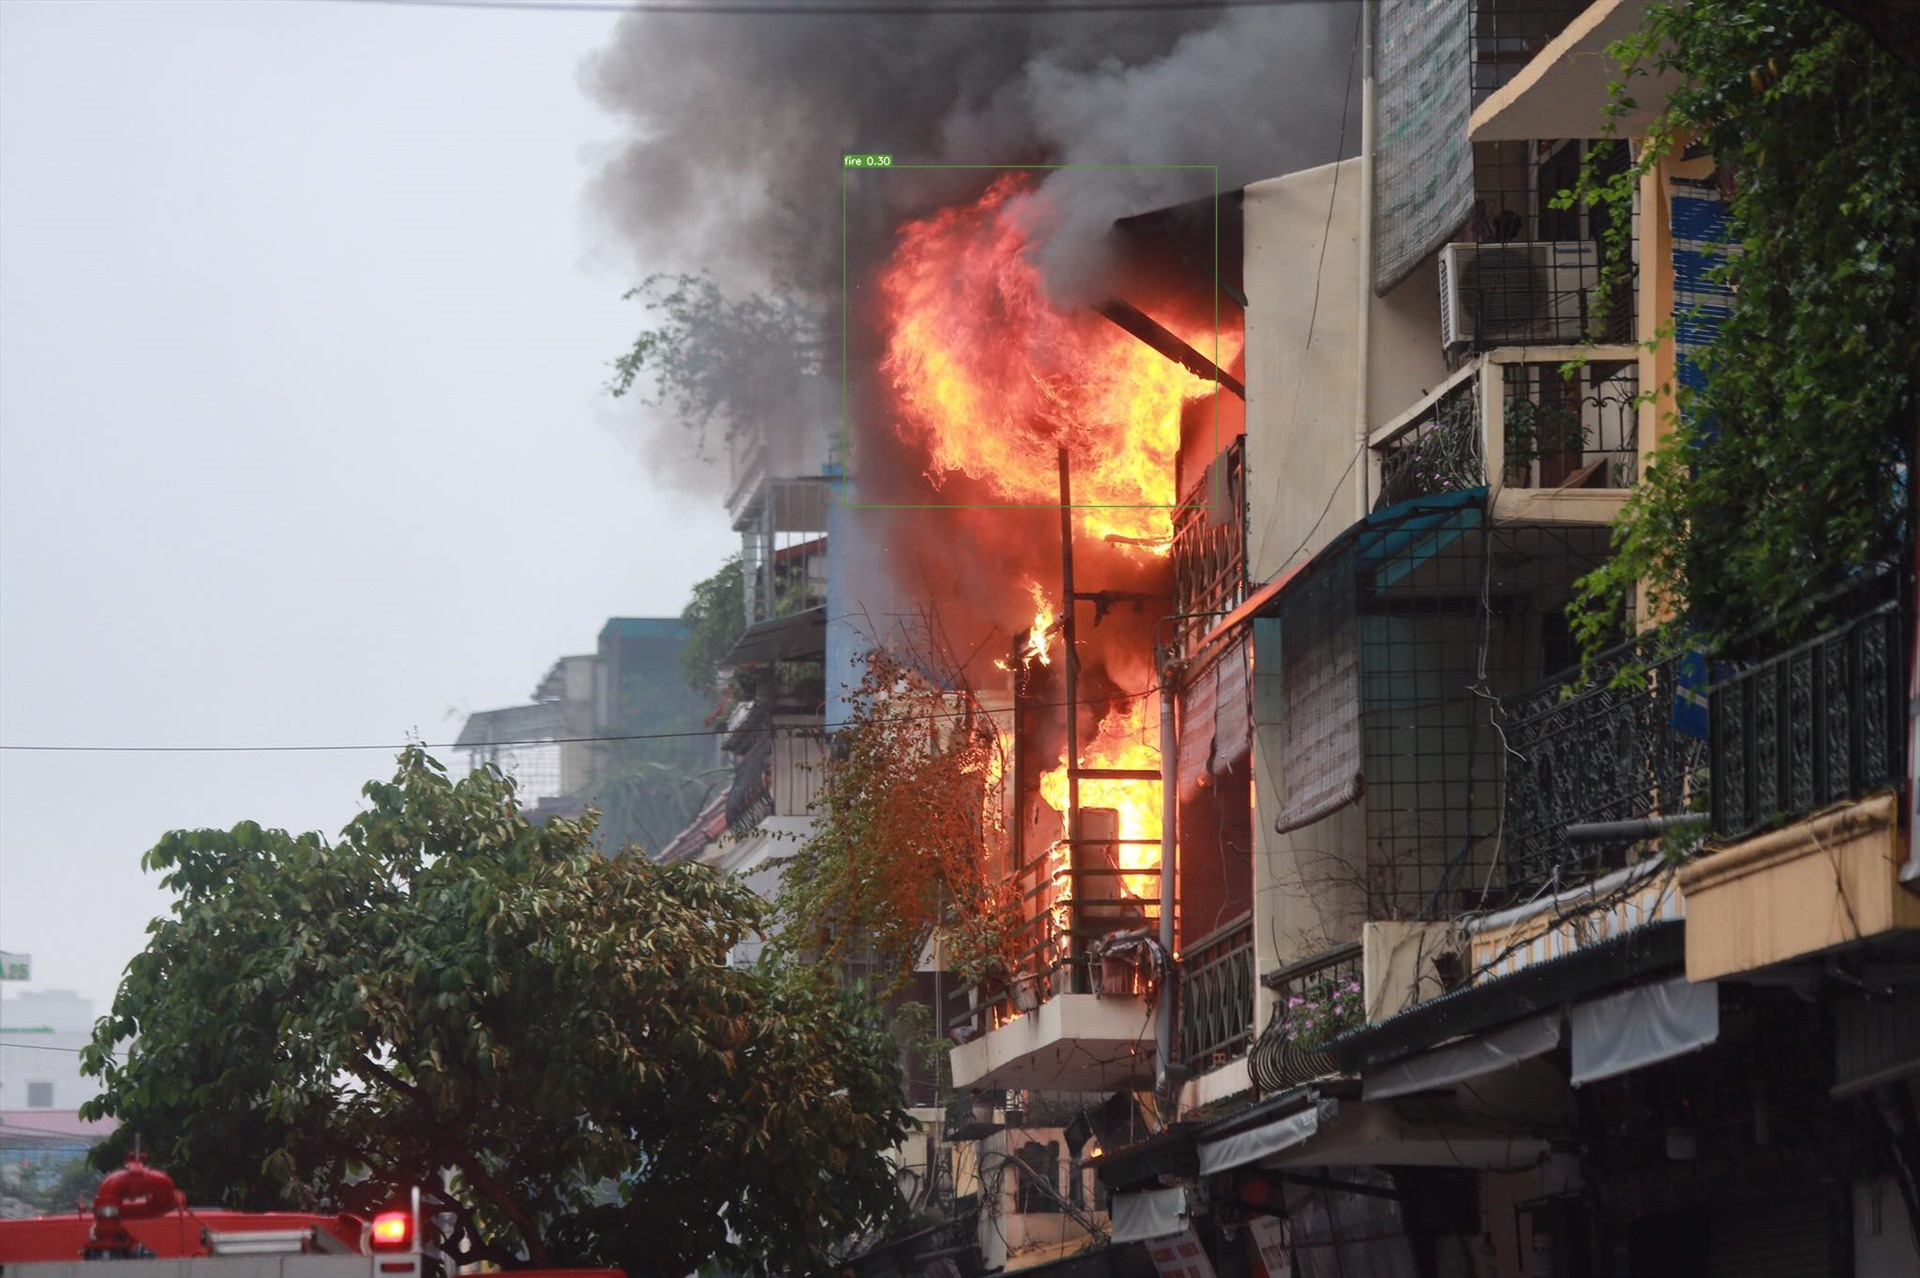

In [3]:
# Xem ảnh đã nhận diện
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp5/Chay-Pho-Co-9.jpg"))